In [1]:
#152854
import cv2
import numpy as np
import matplotlib.pyplot as plt
import itertools
import random
from skimage.color import rgb2gray
from skimage.io import imread
from os import walk,  getcwd
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import normalize 
from sklearn.cluster import KMeans
from sklearn.svm import LinearSVC
from sklearn.datasets import make_classification
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVC

In [2]:
def ls(ruta):
    ruta = '101_ObjectCategories'
    di, subdirs, archivos = next(walk(ruta))
    return subdirs

def ls2(rut):
    ruta = '101_ObjectCategories/' + rut
    listaarchivos = []
    for (_, _, archivos) in walk(ruta):
        listaarchivos.extend(archivos)
    return listaarchivos

Text(0.5, 0, 'Tamaño de muestras que tiene casa clase')

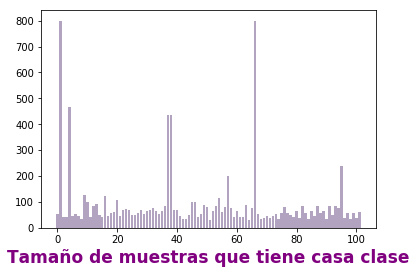

In [24]:
#pregunta 2
lsubs = ls('101_ObjectCategories')

lista = []
subs = np.asarray(lsubs)

for i in range(len(subs)):
    larchi = ls2(subs[i])
    archi = np.asarray(larchi)
    lista.append(larchi)
archivos = np.asarray(lista)

lenarch = np.zeros(102)

lenarch[0] = len(archivos[0])

for i in range((102)):
    lenarch[i] = len(archivos[i])


height = lenarch
x = np.arange(102)
plt.bar(x, height, color=(0.5, 0.4, 0.6, 0.6))
 
plt.xlabel('Tamaño de muestras que tiene casa clase', fontweight='bold', color = 'purple', fontsize='17', horizontalalignment='center')

    


In [4]:
#pregunta 3
etiqueta = subs[lenarch<=80]
muestras = archivos[lenarch<=80]

In [5]:
#pregunta 4 y 5
TL = []
VL = []
for i in range(76):
    train, val = train_test_split(np.asarray(muestras[i]), test_size=0.20, random_state=42)
    TL.append(train) # .tolist()
    VL.append(val)
    
T = np.asarray(TL)
V = np.asarray(VL)


print(T[0])
print(etiqueta[0])

['image_0004.jpg' 'image_0034.jpg' 'image_0035.jpg' 'image_0009.jpg'
 'image_0018.jpg' 'image_0007.jpg' 'image_0005.jpg' 'image_0048.jpg'
 'image_0028.jpg' 'image_0047.jpg' 'image_0046.jpg' 'image_0054.jpg'
 'image_0016.jpg' 'image_0010.jpg' 'image_0017.jpg' 'image_0025.jpg'
 'image_0031.jpg' 'image_0038.jpg' 'image_0026.jpg' 'image_0012.jpg'
 'image_0001.jpg' 'image_0049.jpg' 'image_0037.jpg' 'image_0030.jpg'
 'image_0041.jpg' 'image_0002.jpg' 'image_0022.jpg' 'image_0003.jpg'
 'image_0051.jpg' 'image_0040.jpg' 'image_0036.jpg' 'image_0024.jpg'
 'image_0045.jpg' 'image_0011.jpg' 'image_0023.jpg' 'image_0019.jpg'
 'image_0055.jpg' 'image_0021.jpg' 'image_0008.jpg' 'image_0043.jpg'
 'image_0015.jpg' 'image_0029.jpg' 'image_0052.jpg' 'image_0039.jpg']
accordion


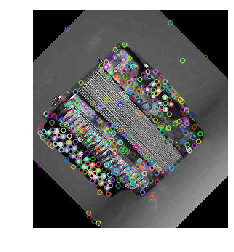

In [6]:
#pregunta 6
def compute_SIFT(ruta):
    img = cv2.imread(ruta)
    gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    sift = cv2.xfeatures2d.SIFT_create()
    kp, des= sift.detectAndCompute(gray,None)
    point = cv2.drawKeypoints(gray, kp, img)
    dataN = normalize(des, norm='l1',axis = 0) 
    return point, dataN

g = '101_ObjectCategories/'+etiqueta[0]+"/"+T[0][1]
img, norm  = compute_SIFT(g)
plt.figure()
plt.imshow(img)
plt.axis('off')
plt.show()
print(np.sum(norm[2,:]))
print(norm.shape)

In [7]:
#pregunta 7

S = np.zeros((20000,128))
i = 0
while i < 20000:
    j = np.random.randint(0, 75)
    l = len(T[j])
    r = np.random.randint(0, l-1)
    g = '101_ObjectCategories/'+etiqueta[j]+'/'+T[j][r]
    img, sift = compute_SIFT(g)
    s = len(sift)
    if i+s >=20000:
        S[i:20000] = sift[0:20000-i]
    else:
        S[i:i+s] = sift
    i += s+1

print(len(S))
print(S)

0.068296656
(535, 128)
20000
[[0.00000000e+00 0.00000000e+00 6.19853032e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.28708879e-05 2.09585021e-04 6.72983285e-03 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.05741783e-03 1.53695687e-03 1.77100854e-04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [5.01967175e-03 2.46184156e-03 2.57931388e-04 ... 7.57575734e-04
  3.77216144e-04 1.03439356e-03]
 [7.32600736e-03 2.46184150e-04 0.00000000e+00 ... 3.40909092e-03
  0.00000000e+00 2.58598389e-04]
 [1.35666807e-04 2.41260454e-02 3.06938346e-02 ... 0.00000000e+00
  3.77216144e-04 1.55159039e-03]]


In [8]:
#pregunta 8
kmeans = KMeans(n_clusters=200, random_state=0).fit(S)
kmeans.labels_

array([123,  41,  92, ..., 183,  56, 105])

In [9]:
#pregunta 9
def get_bow(ruta):
    im = cv2.imread(ruta)
    gray= cv2.cvtColor(im,cv2.COLOR_BGR2GRAY)
    sift = cv2.xfeatures2d.SIFT_create()
    kp, des= sift.detectAndCompute(gray,None)
    predictK = kmeans.predict(des)
    """plt.title('Predicción de etiquitas')
    plt.hist(predictK, bins=60, alpha=1,linewidth=1)
    plt.grid(True)
    plt.show()
    plt.clf()"""

    a = np.ones((len(predictK),1))
    proba = np.zeros((200,1))
    for i in range(200):
        proba[i] = sum(a[predictK == i])
    p = proba.transpose()
    p = p[0]/len(predictK)
    """"a = np.arange(0,200)
    mx = p.max()
    imax = a[p==mx]
    print("Etiqueta con mayor probabilidad es " + str(imax))"""
    return p

ruta ='101_ObjectCategories/'+ etiqueta[55] +"/"+ T[55][1]
distribucion = get_bow(ruta)
print(distribucion)
print(distribucion.shape)



[0.         0.         0.         0.         0.         0.
 0.         0.2345679  0.22839506 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.25925926 0.         0.00411523 0.         0.         0.
 0.         0.         0.01234568 0.         0.         0.
 0.0781893  0.00617284 0.         0.00411523 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.00205761 0.         0.01234568 0.00205761
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.01028807 0.         0.         0.
 0.         0.00411523 0.         0.         0.00205761 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.00205761
 0.         0.         0.         0.         0.         0.
 0.00205761 0.         0.         0.    

In [10]:
#pregunta 10
BOWT = np.zeros((3154,200))
BOW_train = []
for i in range(76):
    l = len(T[i])
    for j in range(l):
        ruta ='C:/Users/Gaby/Documents/VisionCompu/Practica04/101_ObjectCategories/'+ etiqueta[i] +"/"+ T[i][j]
        distr = get_bow(ruta)
        BOW_train.append(distr)
        
BOWT = np.asarray(BOW_train)
print(BOWT[1])
print(BOWT.shape)

[0.         0.         0.         0.         0.         0.
 0.         0.23925234 0.21308411 0.         0.         0.
 0.         0.         0.         0.         0.00373832 0.
 0.23551402 0.         0.01121495 0.         0.         0.
 0.         0.         0.01869159 0.         0.         0.
 0.08785047 0.00560748 0.         0.00186916 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.00747664 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.00560748 0.
 0.         0.         0.         0.         0.         0.
 0.00373832 0.         0.00560748 0.         0.         0.
 0.         0.02056075 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.00373832
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0. 

In [11]:
#pregunta 11
r = np.random.randint(0,3150)
print(sum(BOWT[r]))

1.0


In [12]:
#pregunta 12
BOWV = np.zeros((821,200))
BOW_val = []
for i in range(76):
    l = len(V[i])
    for j in range(l):
        ruta ='C:/Users/Gaby/Documents/VisionCompu/Practica04/101_ObjectCategories/'+ etiqueta[i] +"/"+ V[i][j]
        distr = get_bow(ruta)
        BOW_val.append(distr)
BOWV = np.asarray(BOW_val)
print(BOWV[1])
print(BOWV.shape)


[0.         0.         0.         0.         0.         0.
 0.         0.15076072 0.28630705 0.         0.         0.00138313
 0.         0.         0.         0.         0.00138313 0.
 0.26279391 0.         0.00691563 0.         0.         0.
 0.         0.         0.01383126 0.         0.         0.
 0.05532503 0.01106501 0.         0.00968188 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.00138313 0.01106501
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.00138313 0.
 0.         0.         0.         0.         0.         0.
 0.00138313 0.         0.01383126 0.         0.         0.
 0.         0.02627939 0.         0.         0.         0.
 0.00138313 0.         0.         0.         0.         0.
 0.00138313 0.         0.         0.         0.         0.0055325
 0.         0.         0.         0.         0.         0.
 0.         0.         0.        

In [13]:
r = np.random.randint(0, 820)
print(sum(BOWV[r]))

0.9999999999999998


In [14]:
#pregunta 13

TodasTrain = []
ETrain = []

for i in range(76):
    l = len(T[i])
    for j in range(l):
        TodasTrain.append(T[i][j])
        ETrain.append(i)
TodasImTrain = np.asarray(TodasTrain)
EtiquetasT = np.asarray(ETrain)

clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(BOWT, EtiquetasT)



LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=0, tol=1e-05, verbose=0)

In [15]:
#pregunta 14
pT = []
for i in range(len(BOWT)):
    predT = clf.predict([BOWT[i]])
    pT.append(predT)
pred_train = np.asarray(pT)
print(pred_train)
print(len(pred_train))
marT = mean_absolute_error(EtiquetasT, pred_train)
print(marT)



[[66]
 [36]
 [ 0]
 ...
 [75]
 [75]
 [59]]
3154
22.096068484464173


In [16]:

TodasVal = []
EVal = []

for i in range(76):
    l = len(V[i])
    for j in range(l):
        TodasVal.append(V[i][j])
        EVal.append(i)
TodasImVal = np.asarray(TodasVal)
EtiquetasV = np.asarray(EVal)

clf = LinearSVC(random_state=0, tol=1e-5)
clf.fit(BOWV, EtiquetasV)

pV = []
for i in range(len(BOWV)):
    predV = clf.predict([BOWV[i]])
    pV.append(predV)    
pred_val = np.asarray(pV)
print(pred_val)
print(len(pred_val))

marV = mean_absolute_error(EtiquetasV, pred_val)
print(marV)


[[28]
 [28]
 [28]
 [61]
 [61]
 [14]
 [28]
 [28]
 [28]
 [28]
 [36]
 [73]
 [61]
 [60]
 [36]
 [69]
 [61]
 [64]
 [36]
 [40]
 [15]
 [35]
 [40]
 [61]
 [68]
 [68]
 [47]
 [61]
 [59]
 [36]
 [36]
 [36]
 [40]
 [61]
 [28]
 [36]
 [61]
 [75]
 [24]
 [61]
 [20]
 [42]
 [35]
 [39]
 [36]
 [42]
 [61]
 [14]
 [23]
 [42]
 [36]
 [35]
 [40]
 [36]
 [51]
 [40]
 [61]
 [28]
 [61]
 [55]
 [59]
 [75]
 [75]
 [75]
 [75]
 [55]
 [20]
 [39]
 [15]
 [59]
 [69]
 [24]
 [69]
 [42]
 [73]
 [69]
 [75]
 [20]
 [39]
 [36]
 [59]
 [75]
 [66]
 [23]
 [20]
 [63]
 [36]
 [61]
 [27]
 [21]
 [36]
 [61]
 [73]
 [35]
 [66]
 [75]
 [75]
 [40]
 [75]
 [55]
 [61]
 [69]
 [55]
 [42]
 [59]
 [27]
 [11]
 [28]
 [66]
 [75]
 [15]
 [61]
 [66]
 [66]
 [46]
 [66]
 [61]
 [66]
 [39]
 [73]
 [40]
 [28]
 [66]
 [36]
 [15]
 [35]
 [24]
 [69]
 [68]
 [36]
 [39]
 [20]
 [15]
 [69]
 [28]
 [40]
 [39]
 [39]
 [36]
 [36]
 [73]
 [39]
 [40]
 [61]
 [20]
 [73]
 [36]
 [40]
 [42]
 [36]
 [73]
 [20]
 [73]
 [28]
 [35]
 [36]
 [16]
 [66]
 [61]
 [69]
 [28]
 [35]
 [51]
 [61]
 [73]
 [61]
 [61

In [38]:
#pregunta 15

BOWT = np.zeros((3154,200))
BOW_train = []
for i in range(76):
    l = len(T[i])
    for j in range(l):
        ruta ='C:/Users/Gaby/Documents/VisionCompu/Practica04/101_ObjectCategories/'+ etiqueta[i] +"/"+ T[i][j]
        distr = get_bow(ruta)
        BOW_train.append(distr)
        
BOWT = np.asarray(BOW_train)

cambiosPotencias = [0.003, 0.006, 0.009, 0.03, 0.06, 0.09, 0.3, 0.6, 0.9, 3, 6, 9, 30, 60, 90, 300, 600, 900, 3000, 6000, 9000, 30000, 60000, 90000]
marT = np.zeros((len(cambiosPotencias),1)) 

for g in range(len(cambiosPotencias)):
    clf = SVC(C = cambiosPotencias[g], gamma = 'auto')
    clf.fit(BOWT, EtiquetasT) 
    pT = []
    for i in range(len(BOWT)):
        predT = clf.predict([BOWT[i]])
        pT.append(predT)
    pred_train = np.asarray(pT)
    marT[g] = mean_absolute_error(EtiquetasT, pred_train)
    
print(marT)
#el mejor C es 90000

[[18.66423589]
 [18.66423589]
 [18.66423589]
 [18.66423589]
 [18.66423589]
 [18.66423589]
 [18.66423589]
 [18.66423589]
 [18.66423589]
 [18.66423589]
 [18.66423589]
 [18.66423589]
 [18.36746988]
 [19.42897907]
 [19.62935954]
 [20.00697527]
 [19.46987952]
 [19.37000634]
 [18.78883957]
 [18.48414711]
 [18.19911224]
 [16.42485732]
 [15.18928345]
 [14.41407736]]


In [39]:

BOWV = np.zeros((821,200))
BOW_val = []
for i in range(76):
    l = len(V[i])
    for j in range(l):
        ruta ='C:/Users/Gaby/Documents/VisionCompu/Practica04/101_ObjectCategories/'+ etiqueta[i] +"/"+ V[i][j]
        distr = get_bow(ruta)
        BOW_val.append(distr)
BOWV = np.asarray(BOW_val)

marV = np.zeros((len(cambiosPotencias),1)) 

for g in range(len(cambiosPotencias)):
    clf = SVC(C = cambiosPotencias[g], gamma = 'auto')
    clf.fit(BOWV, EtiquetasV) 
    pV = []
    for i in range(len(BOWV)):
        predV = clf.predict([BOWV[i]])
        pV.append(predV)    
    pred_val = np.asarray(pV)
    marV[g] = mean_absolute_error(EtiquetasV, pred_val)
print(marV)
#el mejor C es 90000

[[18.41534714]
 [18.41534714]
 [18.41534714]
 [18.41534714]
 [18.41534714]
 [18.41534714]
 [18.41534714]
 [18.41534714]
 [18.41534714]
 [18.41534714]
 [18.41534714]
 [18.41534714]
 [18.41534714]
 [18.41534714]
 [18.41534714]
 [18.30694275]
 [18.80511571]
 [18.51644336]
 [17.66991474]
 [17.37028015]
 [17.16443362]
 [14.79780755]
 [11.19488429]
 [ 9.81851401]]


Text(0.5, 0, 'Error de clasificación para training set al cambiar C')

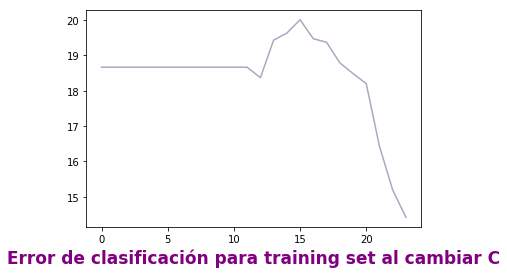

In [40]:
#pregunta 16

x = np.arange(24)
plt.plot(x, marT.transpose()[0], color=(0.5, 0.4, 0.6, 0.6))
plt.xlabel('Error de clasificación para training set al cambiar C', fontweight='bold', color = 'purple', fontsize='17', horizontalalignment='center')


Text(0.5, 0, 'Error de clasificación para validación set al cambiar C')

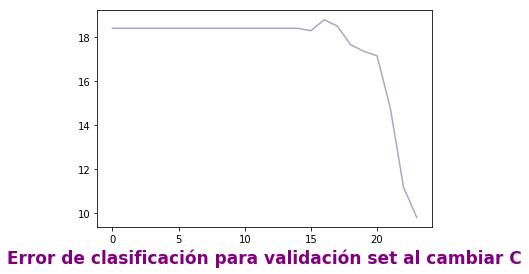

In [41]:
plt.plot(x, marV.transpose()[0], color=(0.5, 0.4, 0.6, 0.6))
plt.xlabel('Error de clasificación para validación set al cambiar C', fontweight='bold', color = 'purple', fontsize='17', horizontalalignment='center')
